### Nome: Guilherme Silva Câmara
### Email: gsc3@cesar.school
### Dataset: https://www.kaggle.com/datasets/mloey1/ahcd1

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
!curl -L -o ./ahcd1.zip\
  https://www.kaggle.com/api/v1/datasets/download/mloey1/ahcd1
!unzip -o ./ahcd1.zip -d .

In [14]:
train_df = pd.read_csv("csvTrainImages 13440x1024.csv", header=None)
train_labels_df = pd.read_csv("csvTrainLabel 13440x1.csv", header=None)

test_df = pd.read_csv("csvTestImages 3360x1024.csv", header=None)
test_labels_df = pd.read_csv("csvTestLabel 3360x1.csv", header=None)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)

Train size: (13440, 1024)
Test size: (3360, 1024)


In [15]:
X_train = train_df.values.astype("float32") / 255.0
X_test = test_df.values.astype("float32") / 255.0

y_train_raw = train_labels_df.values.flatten()
y_test_raw = test_labels_df.values.flatten()

y_train_raw -= 1
y_test_raw -= 1

y_train = keras.utils.to_categorical(y_train_raw, num_classes=28)
y_test = keras.utils.to_categorical(y_test_raw, num_classes=28)


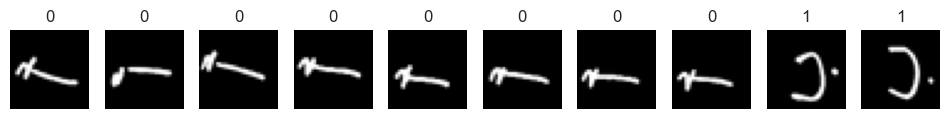

In [16]:
plt.figure(figsize=(12, 3))
for i in range(10):
    img = X_train[i].reshape(32, 32)
    label = np.argmax(y_train[i])
    plt.subplot(1, 10, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(label)
    plt.axis("off")
plt.show()


In [17]:
model = keras.Sequential([
    layers.Input(shape=(1024,)),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(28, activation="softmax")
])


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 696,220 (2.66 MB)

 Trainable params: 694,428 (2.65 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [18]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=8, verbose=1, restore_best_weights=True
    ),
]

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2004 - loss: 2.7470 - val_accuracy: 0.3013 - val_loss: 2.3775 - learning_rate: 0.0010
Epoch 2/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3850 - loss: 1.8947 - val_accuracy: 0.4345 - val_loss: 1.7387 - learning_rate: 0.0010
Epoch 3/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4779 - loss: 1.5644 - val_accuracy: 0.5104 - val_loss: 1.4731 - learning_rate: 0.0010
Epoch 4/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5229 - loss: 1.3854 - val_accuracy: 0.5595 - val_loss: 1.2922 - learning_rate: 0.0010
Epoch 5/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5707 - loss: 1.2354 - val_accuracy: 0.5833 - val_loss: 1.2435 - learning_rate: 0.0010
Epoch 6/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6029 - loss: 1.1427 - val_accuracy: 0.5964 - val_loss: 1.1634 - learning_rate: 0.0010
Epoch 7/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6287 - loss: 1.0536 - 

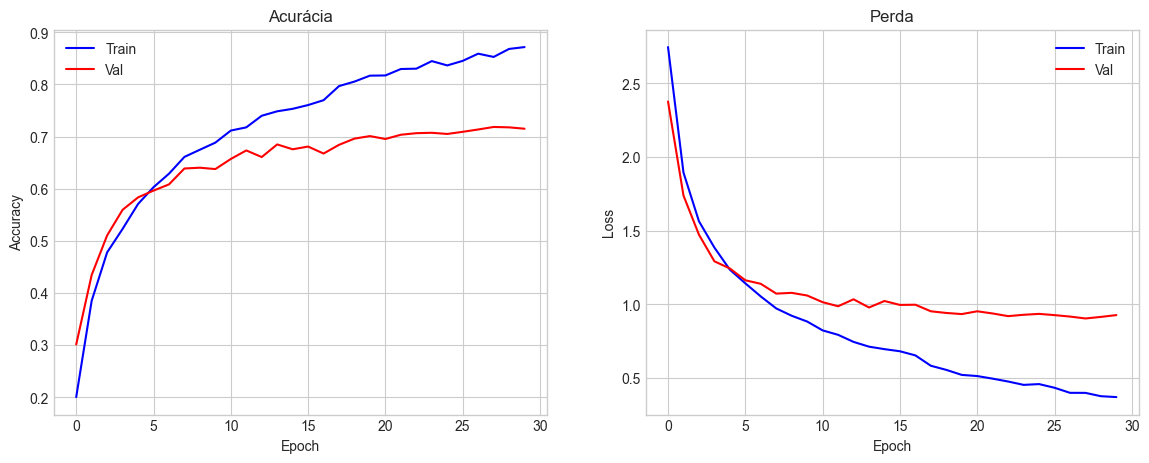

In [19]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], color='blue')
plt.plot(history.history["val_accuracy"], color='red')
plt.title("Acurácia")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], color='blue')
plt.plot(history.history["val_loss"], color='red')
plt.title("Perda")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])

plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Acurácia no Teste:", test_acc)
print("Loss no Teste:", test_loss)


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.6315
Acurácia no Teste: 0.800000011920929
Loss no Teste: 0.6314656734466553


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


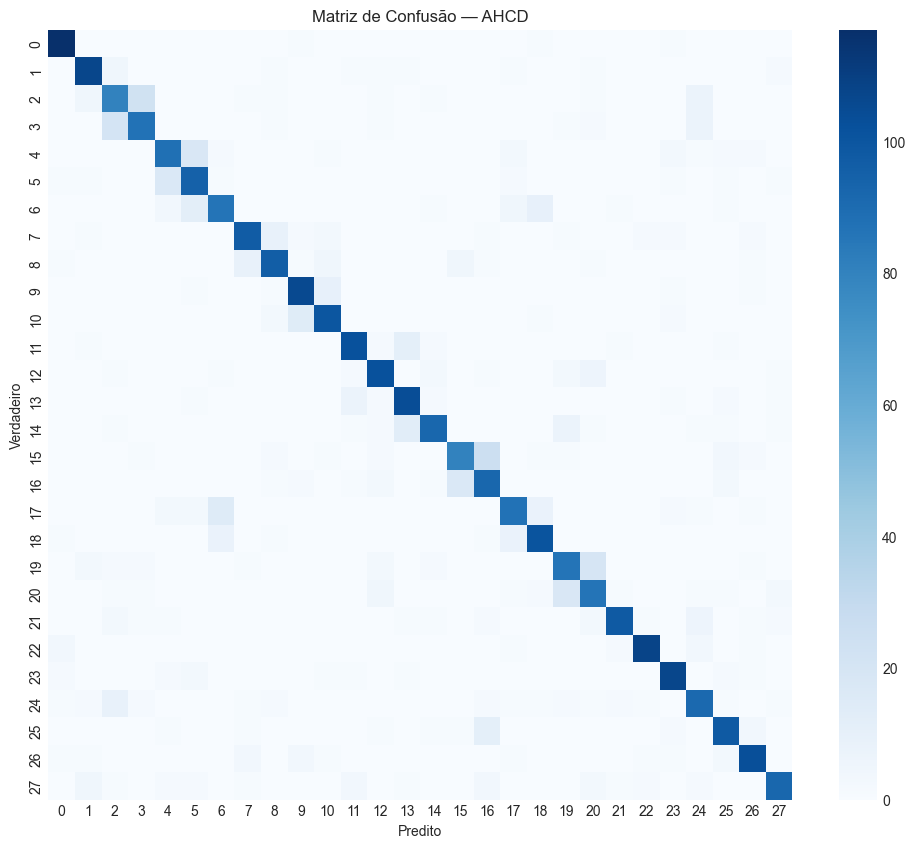

In [21]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Matriz de Confusão — AHCD")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


In [22]:
print(classification_report(y_true, y_pred_labels))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       120
           1       0.85      0.89      0.87       120
           2       0.65      0.67      0.66       120
           3       0.74      0.72      0.73       120
           4       0.75      0.73      0.74       120
           5       0.70      0.79      0.75       120
           6       0.76      0.72      0.74       120
           7       0.84      0.81      0.83       120
           8       0.81      0.80      0.81       120
           9       0.82      0.88      0.85       120
          10       0.82      0.83      0.83       120
          11       0.86      0.85      0.85       120
          12       0.82      0.85      0.83       120
          13       0.79      0.87      0.83       120
          14       0.87      0.77      0.81       120
          15       0.78      0.67      0.72       120
          16       0.65      0.77      0.70       120
          17       0.79    

Durante o treinamento do modelo, o principal desafio foi encontrar um equilíbrio entre underfitting e overfitting. O uso de dropout, batch normalization e callbacks como EarlyStopping e ReduceLROnPlateau ajudou a estabilizar o aprendizado e reduzir o overfitting. Também precisei ajustar a taxa de aprendizado para evitar oscilações no loss. No fim, o modelo alcançou cerca de 80% de acurácia, indicando uma boa generalização.